In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
os.chdir("D:\CDAC\Machine Learning")
df = pd.read_csv('Day7.csv')

In [3]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [7]:
#Model Building
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
#prediction
classifier.predict(scaler.transform([[40,78000]]))

array([0], dtype=int64)

## Will not purchase

In [9]:
#prediction
classifier.predict(scaler.transform([[40,108000]]))

array([1], dtype=int64)

## Will Purchase

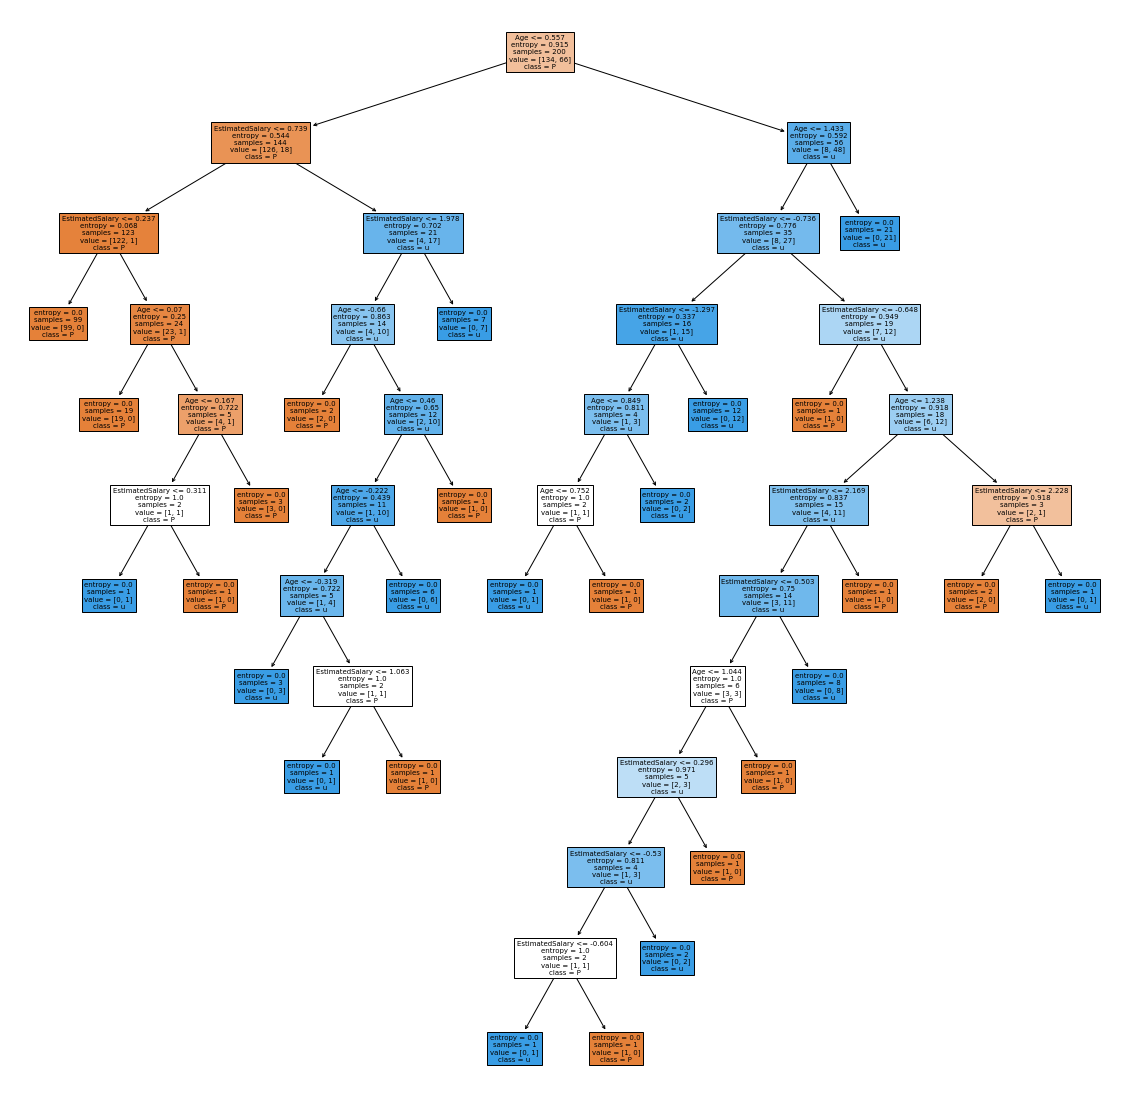

In [10]:
from sklearn import tree
fig = plt.figure(figsize=(20,20))
fig = tree.plot_tree(classifier, feature_names = df.columns, class_names='Purchased', filled = True)

# Random Forest

In [11]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators=200, criterion='entropy',random_state=0)
classifier1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [16]:
y_pred = classifier1.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 3, 29]], dtype=int64)

In [19]:
accuracy_score(y_test,y_pred)

0.92

In [21]:
classifier1.predict(scaler.transform([[40,98000]]))

array([1], dtype=int64)

Prediction made by model if age 40 and salary is 98000 will purchase item

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


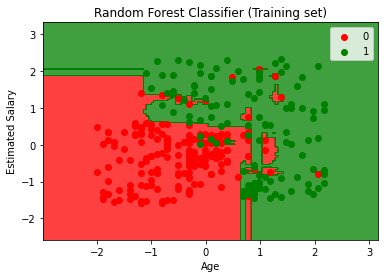

In [25]:
from matplotlib.colors import ListedColormap
x_Set, y_Set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_Set[:, 0].min() - 1, stop = x_Set[:, 0].max() + 1, step = 0.01),
					 np.arange(start = x_Set[:, 1].min() - 1, stop = x_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier1.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
			 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(x_Set[y_Set == j, 0], x_Set[y_Set == j, 1],
c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()